In [1]:
import time
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # Enable tf v1 behavior as in v2 a lot have changed
import dl_utils as utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__

Instructions for updating:
non-resource variables are not supported in the long term


'1.14.1'

In [2]:
data = pd.read_csv("data/birth_rate.csv")
data.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [3]:
# Split data/labels
data_X = np.array(data['Birth rate'])
data_Y = np.array(data['Life expectancy'])

In [4]:
# Reshape labels for keras loss compatibility
data_Y = data_Y.reshape(-1, 1)

In [5]:
# Define a path for tensorboard graphs
logdir = './graphs/linear'

In [6]:
## Create placeholders for X, Y
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [7]:
## Create weight and bias initialised to 0
w = tf.get_variable('weight', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [8]:
## Prediction
Y_hat = tf.add(tf.multiply(X,w), b)

In [9]:
## Loss Function - MSE 
loss = tf.keras.losses.mean_squared_error(Y,Y_hat)
#loss = huber_loss(Y,Y_hat)

## Define gradient descent as the optimizer to minimise the loss
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [10]:
# Initialise a cpu/gpu session
sess = tf.Session()

# Initialise a gpu session properly
#sess = utils.gpu_session()

### Training with feed_dict

In [11]:
history = []
start = time.time()

# Graph variable initialization
sess.run(tf.global_variables_initializer())

# Open stream for tensorboard
#writer = tf.summary.FileWriter(logdir, sess.graph)

# Start training
for i in range(50):
    total_loss = 0
    
    for x in range(len(data)):
        _, l = sess.run([optimizer,loss], feed_dict={X: data_X[x], Y:data_Y[x]})
        total_loss += l
        
    if (i) % 10 == 0:        
        dw, db = sess.run([w,b])
        y_hat = data_X * dw + db
        history.append(y_hat)
        
        print('Epoch {0}: {1}, w: {2}, b: {3}'.format(i, total_loss/len(data), dw, db))
        #print('dw: %f, db: %f\n' %(dw, db))   

#writer.close()

print('Train Time: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287, w: 10.362069129943848, b: 8.945574760437012
Epoch 10: 335.55436177954664, w: 2.9441070556640625, b: 43.72689437866211
Epoch 20: 119.20935661137888, w: -1.1863524913787842, b: 62.60636901855469
Epoch 30: 55.77163058824279, w: -3.432528257369995, b: 72.87317657470703
Epoch 40: 37.305592010505066, w: -4.654055595397949, b: 78.4565200805664
Train Time: 7.277701 seconds


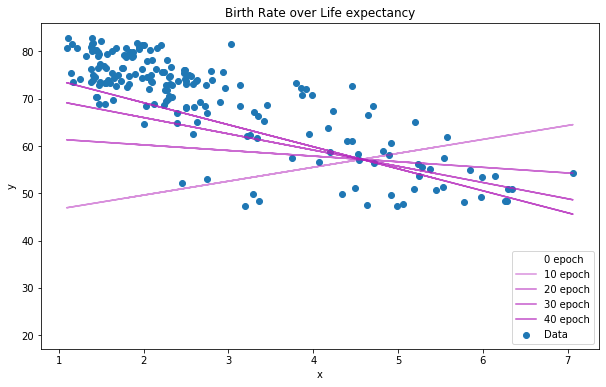

In [12]:
# Plot dataset and fit lines
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(data_X,data_Y, label="Data")
for i in range(len(history)):
    ax.plot(data_X,history[i], c='#b222ba',label=str(i*10)+" epoch", alpha = i/(i+1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Birth Rate over Life expectancy')
ax.legend()

In [14]:
%load_ext tensorboard

In [15]:
%tensorboard --logdir graphs